# Importing Librarys

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import datetime
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_curve,roc_curve,confusion_matrix,precision_score,recall_score,precision_score,plot_confusion_matrix,precision_recall_fscore_support
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
sns.set()

# Importing Data

In [ ]:
train=pd.read_csv('/content/drive/My Drive/data/Train_Set.csv')
train['account_id']=train['account_id'].astype('int64')
test=pd.read_csv('/content/drive/My Drive/data/Test_Set.csv')

train.head()

,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,Label
0,100559,2018-09-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,101026,2018-09-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,101026,2018-09-10,0.0,0.0,86.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,18.666667,0.0,3.000000,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,0.0,0.0,0.666667,84.666667,0.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,101026,2018-09-17,0.0,0.0,-0.076046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067797,0.0,-0.250000,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.300000,0.0,0.0,-0.400000,-0.194553,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,101026,2018-09-24,0.0,0.0,-0.987654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,-0.5,-0.952381,0.0,-0.666667,-0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.571429,0.0,0.0,0.000000,-0.985507,0.0,0.0,0.0,0.0,0.0,-0.812500,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Finding maximum and minumun date in week_start_date

In [ ]:
dtOBJ=pd.to_datetime(train['week_start_date'])
print(max(dtOBJ))
print(min(dtOBJ))

2020-03-30 00:00:00
2018-09-03 00:00:00


**Observation**

> Date range is from 2018-09-03 to 2020-03-30 and dates have difference of ***7 days*** or ***one week*** and all dates are recoded on ***Monday***




In [ ]:
((max(dtOBJ)-min(dtOBJ))/7)+timedelta(days=1)

Timedelta('83 days 00:00:00')

**Observation**

> In case of complete data for a particular user it should contain ***83 entries*** in week_start_date column 

# Exploring data for account_id = 100559

In [ ]:
train[train['account_id']==100559]

,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,Label
0,100559,2018-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25334,100559,2018-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


**Observation**

> In this case there are ***duplicate value*** for the date ***2018-09-08*** in account_id ***150059***

> Also all the entries are ***same*** that is ***zero***

# Exploring data for account_id = 101026

In [ ]:
train[train['account_id']==101026]

,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,Label
1,101026,2018-09-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,101026,2018-09-10,0.0,0.0,86.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,18.666667,0.0,3.000000,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.333333,0.0,0.0,0.666667,84.666667,0.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,101026,2018-09-17,0.0,0.0,-0.076046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.067797,0.0,-0.250000,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.300000,0.0,0.0,-0.400000,-0.194553,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,101026,2018-09-24,0.0,0.0,-0.987654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.500000,0.0,0.0,0.0,0.0,0.0,-0.500000,-0.952381,0.0,-0.666667,-0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.571429,0.0,0.0,0.000000,-0.985507,0.0,0.0,0.0,0.0,0.0,-0.812500,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,101026,2018-10-01,0.0,0.0,245.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.0,0.0,0.0,0.0,0.0,1.333333,19.000000,0.0,2.333333,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.666667,0.0,0.0,0.000000,104.666667,0.0,0.0,0.0,0.0,0.0,3.000000,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25414,101026,2020-03-02,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25415,101026,2020-03-09,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25416,101026,2020-03-16,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25417,101026,2020-03-23,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


**Observation**

> There are 168 entries in account_id 101026

> Also account_id 1010026 have date range from 2018-09-03 to 2020-03-30 which means there should be exact 83 entries

> But there are 168 entries which means it contains 85 duplicate value

In [ ]:
train[train['account_id']==101026].head(40) # 2019-4-22 multiple,

,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,Label
1,101026,2018-09-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,101026,2018-09-10,0.0,0.0,86.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,18.666667,0.0,3.000000,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.333333,0.0,0.0,0.666667,84.666667,0.000000,0.0,0.000000,0.0,0.0,7.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,101026,2018-09-17,0.0,0.0,-0.076046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.067797,0.0,-0.250000,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.300000,0.0,0.0,-0.400000,-0.194553,0.000000,0.0,0.000000,0.0,0.0,-0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,101026,2018-09-24,0.0,0.0,-0.987654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.500000,0.0,0.0,0.000000,0.0,0.0,-0.500000,-0.952381,0.0,-0.666667,-0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.571429,0.0,0.0,0.000000,-0.985507,0.000000,0.0,0.000000,0.0,0.0,-0.812500,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,101026,2018-10-01,0.0,0.0,245.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.333333,0.0,0.0,0.000000,0.0,0.0,1.333333,19.000000,0.0,2.333333,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.333333,0.0,0.000000,0.000000,1.666667,0.0,0.0,0.000000,104.666667,0.000000,0.0,0.000000,0.0,0.0,3.000000,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,101026,2018-10-08,0.0,0.0,-0.684709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.142857,0.0,0.0,0.000000,0.0,0.0,-0.142857,0.183333,0.0,0.100000,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,-0.250000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.157729,0.000000,0.0,0.000000,0.0,0.0,0.666667,0.0,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,101026,2018-10-15,0.0,0.0,0.171674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.0,0.000000,0.0,0.0,-0.333333,-0.507042,0.0,-0.090909,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.125000,0.0,0.0,0.000000,-0.182561,0.000000,0.0,0.000000,0.0,0.0,-0.100000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,101026,2018-10-22,0.0,0.0,-0.073260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.000000,0.0,0.0,0.500000,-0.028571,0.0,0.200000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.142857,0.0,0.0,0.000000,-0.186667,0.000000,0.0,0.000000,0.0,0.0,-0.277778,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,101026,2018-10-29,0.0,0.0,-0.237154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.500000,0.0,0.0,0.000000,0.0,0.0,-0.500000,-0.264706,0.0,-0.250000,-0.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.375000,0.0,0.0,0.000000,-0.098361,0.000000,0.0,0.000000,0.0,0.0,-0.153846,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10,101026,2018-11-05,0.0,0.0,0.196891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

**Observation**

> 2019-4-22 contains two entries in account_id 101026 and both the entries are distint

> First entry contains non-zero values in few columns like in feature15 its value is 0.50

> But, In case of 2nd entry all the values are zero

> Which means 2nd entrie is just a Wrong entry

> I have observe the above characterstics in all cases 

> Similarly, I have observed other cases/account_id and find that there are multiple entries and the first one is correct and the rest is just wrong data point which is created by mistake

**Action**

> We'll be removing all the wrong and duplicate entries from our dataset

**Total number of accounts or user in training set**

In [ ]:
train['account_id'].nunique()

2690

**Finding maximum no of entries(week_start_date) in a particular account_id**

In [ ]:
listOfAcount_id = train['account_id'].unique().tolist()

max_no_of_entry_for_one_account = 0
for i in listOfAcount_id:
  len_ = train[train['account_id']==i].shape[0]
  if (len_>max_no_of_entry_for_one_account):
    max_no_of_entry_for_one_account=len_
print(max_no_of_entry_for_one_account) 

280


**Obseration**

> maximum entries are 280 in a particular account_id but it should be 83

> By this output we have verified that our data have wrong and duplicate values

# Lets explore the same problem( of duplicate and wrong entries) by visulization

* In the next block of code, we have created a list which contains total number of entries in each account
* Then, we have converted that list into a Series and sorted it for better visulization
* Finally, we have ploted the same







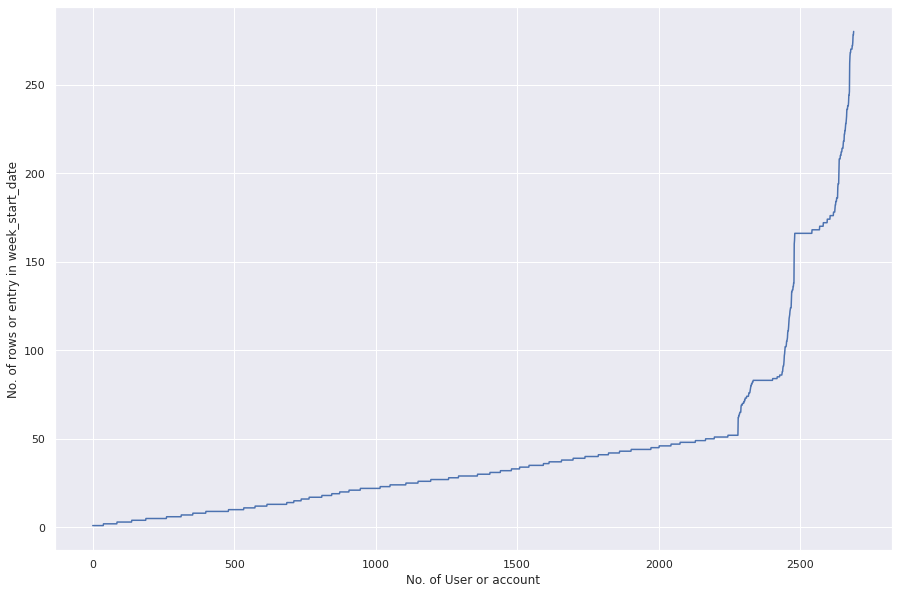

In [ ]:
var_=[]
for i in listOfAcount_id:
  len_ = train[train['account_id']==i].shape[0]
  var_.append(len_)

var_=pd.Series(var_,index=listOfAcount_id)
var_=var_.sort_values()
#print(var_.head())  

rcParams['figure.figsize'] = 15, 10

plt.plot(var_.values)
plt.xlabel("No. of User or account")
plt.ylabel("No. of rows or entry in week_start_date")
plt.show()

**Observation**

> We can clearly observe that there are lot of accounts where the entries are more then 83

# Looking at first 500 entries of the same plot

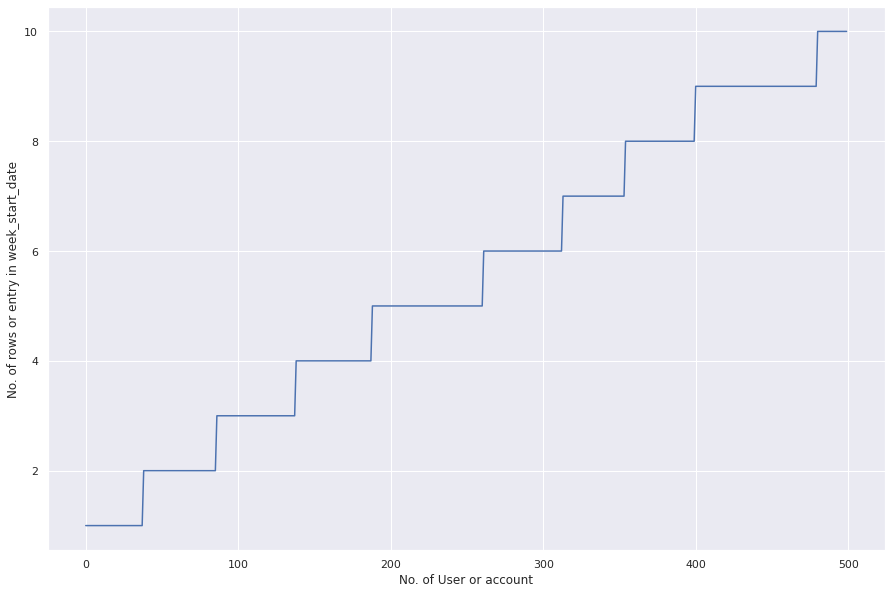

In [ ]:
plt.plot(var_[:500].values)
plt.xlabel("No. of User or account")
plt.ylabel("No. of rows or entry in week_start_date")
plt.show()

**Observation**
> More then 500 account_id <= 10 entries

# Droping all the duplicate and wrong entries from our train set

In [ ]:
train.drop_duplicates(keep='first',inplace=True,subset=['account_id','week_start_date'])

After droping duplicate and wrong entreies, Let's check the maximum number of entries in a paricular account_id

In [ ]:
listOfAcount_id = train['account_id'].unique().tolist()

max_no_of_entry_for_one_account=0
for i in listOfAcount_id:
  len_ = train[train['account_id']==i].shape[0]
  if (len_>max_no_of_entry_for_one_account):
    account_id_max=i
    max_no_of_entry_for_one_account=len_
print(max_no_of_entry_for_one_account) 

83


**Observation**

> Now, we have maximum 83 entries in any account_id 

> Which means we have droped all wrong and duplicate entries from our training set successfully

Now Let's visualize the graph between the **number of entries** and **accounts** 

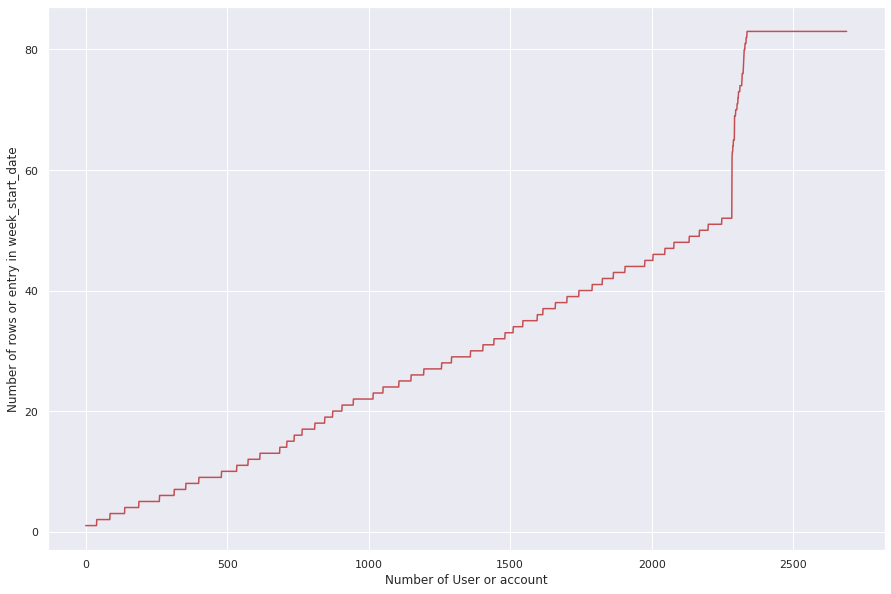

In [ ]:
max_no_of_entry_for_accounts=[]
for i in listOfAcount_id:
  len_ = train[train['account_id']==i].shape[0]
  max_no_of_entry_for_accounts.append(len_)

max_no_of_entry_for_accounts=pd.Series(max_no_of_entry_for_accounts,index=listOfAcount_id)
max_no_of_entry_for_accounts=max_no_of_entry_for_accounts.sort_values()

plt.plot(max_no_of_entry_for_accounts.values,"r-")
plt.xlabel("Number of User or account")
plt.ylabel("Number of rows or entry in week_start_date")
plt.show()

**Observation**

> we have ***no account*** which have ***more then 83 entries***

> That means our data is ***ready for next step***

Looking at the same plot closely 

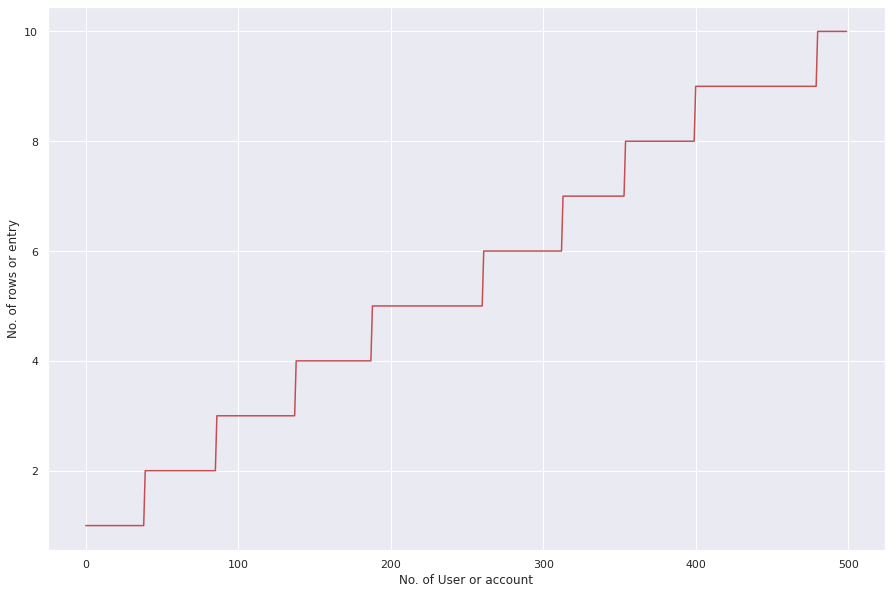

In [ ]:
plt.plot(max_no_of_entry_for_accounts[:500].values,"r-")
plt.xlabel("No. of User or account")
plt.ylabel("No. of rows or entry")
plt.show()

# Plotting graph with account_id and there respective entries


This plot contains last 50 account(don't forget we have sorted this pandas Series)

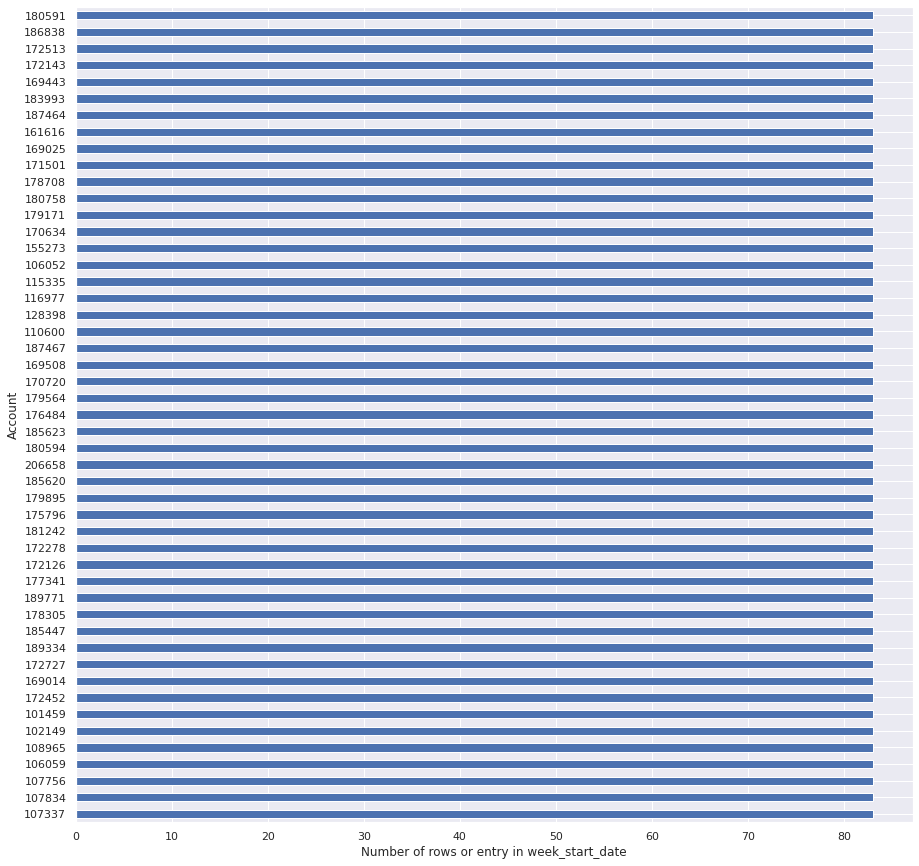

In [ ]:
max_no_of_entry_for_accounts[-50:-1].plot(kind='barh',figsize=(15,15))
plt.xlabel("Number of rows or entry in week_start_date")
plt.ylabel("Account")
plt.show()

This plot contains first 50 account(don't forget we have sorted this pandas Series)

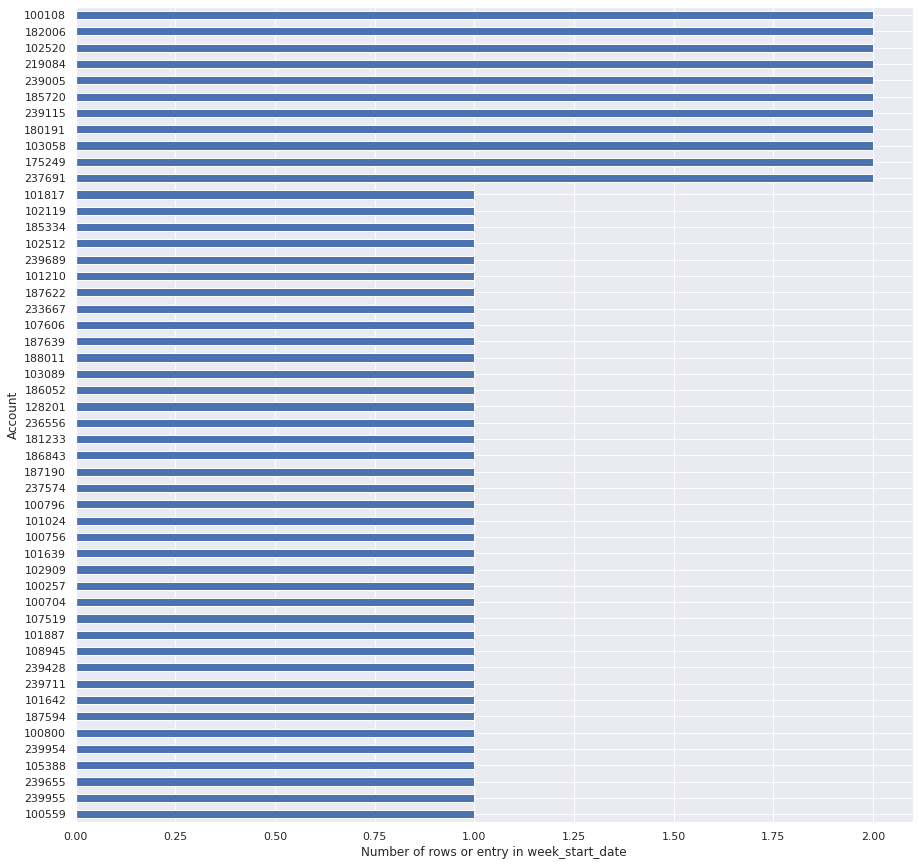

In [ ]:
max_no_of_entry_for_accounts[:50].plot(kind='barh',figsize=(15,15))
plt.xlabel("Number of rows or entry in week_start_date")
plt.ylabel("Account")
plt.show()

In [ ]:
train.shape

(91295, 65)

In [ ]:
train.head()

,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,Label
0,100559,2018-09-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,101026,2018-09-03,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,101026,2018-09-10,0.0,0.0,86.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,18.666667,0.0,3.000000,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,0.0,0.0,0.666667,84.666667,0.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,101026,2018-09-17,0.0,0.0,-0.076046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067797,0.0,-0.250000,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.300000,0.0,0.0,-0.400000,-0.194553,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,101026,2018-09-24,0.0,0.0,-0.987654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,-0.5,-0.952381,0.0,-0.666667,-0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.571429,0.0,0.0,0.000000,-0.985507,0.0,0.0,0.0,0.0,0.0,-0.812500,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
train_=train.copy()
train_.drop(['account_id','week_start_date'],axis=1,inplace=True)
train_.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,Label
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,86.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,18.666667,0.0,3.000000,2.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.333333,0.0,0.0,0.666667,84.666667,0.0,0.0,0.0,0.0,0.0,7.000000,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,-0.076046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067797,0.0,-0.250000,0.272727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.300000,0.0,0.0,-0.400000,-0.194553,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,-0.987654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,-0.5,-0.952381,0.0,-0.666667,-0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.571429,0.0,0.0,0.000000,-0.985507,0.0,0.0,0.0,0.0,0.0,-0.812500,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Visualizing data using TSNE 

# I'll request you not to run this and the next shell because It will take about 30 min to execute


In [ ]:
#Don't run this shell it will take too much time
'''m = TSNE(learning_rate=100,verbose=0)

tsne = m.fit_transform(train_)
train_['x'] = tsne[:,0]
train_['y'] = tsne[:,1]'''

"m = TSNE(learning_rate=100,verbose=0)\n\ntsne = m.fit_transform(train_)\ntrain_['x'] = tsne[:,0]\ntrain_['y'] = tsne[:,1]"

In [ ]:
'''sns.scatterplot(x='x',y='y',hue='Label',data=train_)'''

"sns.scatterplot(x='x',y='y',hue='Label',data=train_)"

![alt text](https://drive.google.com/uc?export=view&id=1RKCr-tvSJtsPmW7bl8bTDyqAEiZg0-_a)

#IMPORTANT NOTE

As we know, This is a panel data which means the output(or dependent variable) also depends upon the output(or dependent variable) of previous query

Here, We'll be creating new feature which contains the values of previous timestamp because our output depands on previous data as well

* This columns are not choose randomly 
* I have chossen this parameter by various feature selection technics which include variance Thresholding, feature importance by models like RandomForest, autocorrelection
and also correlection 
* we have taken previous 5 generation of data
* and for those entries who have less then 5 generation of previous data it will fill NaN on that position and later we'll be making it as zero 

Don't worry if you are thinking that we are increassing the Dimensionality of our data which may lead to overfitting because we'll be dealing with this problem later

> If you have any question regarding the same please ask this to me I will explain.

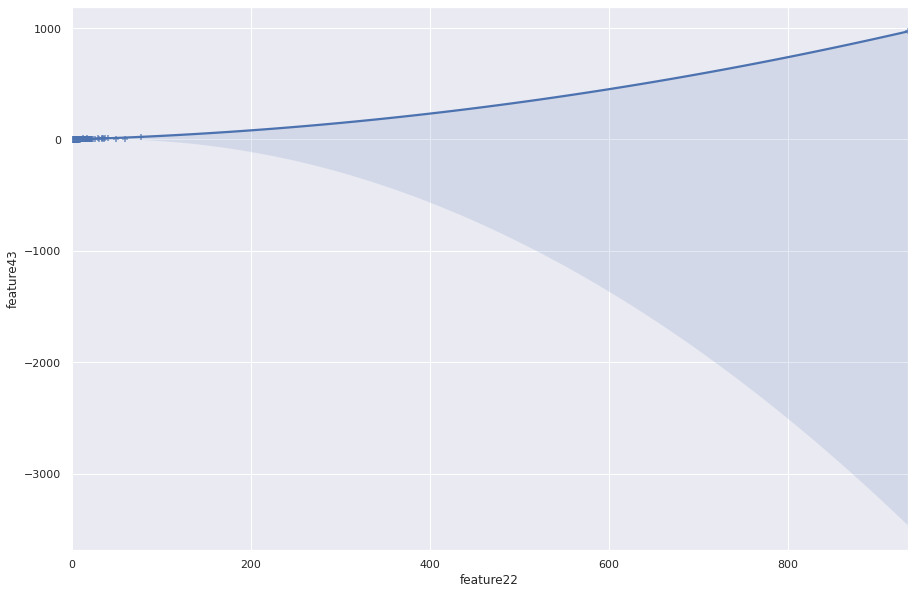

In [ ]:
sns.regplot(x='feature22'
            ,y='feature43',data=train,marker='+',order=2);  

In [ ]:
unique_account=train['account_id'].unique().tolist()
train=train.set_index(['account_id','week_start_date'])

dataFrame_list=[]

for i in tqdm(unique_account):
  temp_df=train.loc[i,:]
  temp_df['account_id']=i

  temp_df=temp_df.sort_values(by=['account_id','week_start_date'])

  temp_df['Label_pre_1'] = temp_df['Label'].shift(1)
  temp_df['Label_pre_2'] = temp_df['Label'].shift(2)
  temp_df['Label_pre_3']=temp_df['Label'].shift(3)
  temp_df['Label_pre_4']=temp_df['Label'].shift(4)
  temp_df['Label_pre_5']=temp_df['Label'].shift(5)

  temp_df['feature15_pre_1'] = temp_df['feature15'].shift(1)
  temp_df['feature15_pre_2'] = temp_df['feature15'].shift(2)
  temp_df['feature15_pre_3'] = temp_df['feature15'].shift(3)
  temp_df['feature15_pre_4'] = temp_df['feature15'].shift(4)
  temp_df['feature15_pre_5'] = temp_df['feature15'].shift(5)

  temp_df['feature37_pre_1'] = temp_df['feature37'].shift(1)
  temp_df['feature37_pre_2'] = temp_df['feature37'].shift(2)
  temp_df['feature37_pre_3'] = temp_df['feature37'].shift(3)
  temp_df['feature37_pre_4'] = temp_df['feature37'].shift(4)
  temp_df['feature37_pre_5'] = temp_df['feature37'].shift(5)

  temp_df['feature16_pre_1'] = temp_df['feature16'].shift(1)
  temp_df['feature16_pre_2'] = temp_df['feature16'].shift(2)
  temp_df['feature16_pre_3'] = temp_df['feature16'].shift(3)
  temp_df['feature16_pre_4'] = temp_df['feature16'].shift(4)
  temp_df['feature16_pre_5'] = temp_df['feature16'].shift(5)

  temp_df['feature55_pre_1'] = temp_df['feature55'].shift(1)
  temp_df['feature55_pre_2'] = temp_df['feature55'].shift(2)
  temp_df['feature55_pre_3'] = temp_df['feature55'].shift(3)
  temp_df['feature55_pre_4'] = temp_df['feature55'].shift(4)
  temp_df['feature55_pre_5'] = temp_df['feature55'].shift(5)

  temp_df['feature3_pre_1'] = temp_df['feature3'].shift(1)
  temp_df['feature3_pre_2'] = temp_df['feature3'].shift(2)
  temp_df['feature3_pre_3'] = temp_df['feature3'].shift(3)
  temp_df['feature3_pre_4'] = temp_df['feature3'].shift(4)
  temp_df['feature3_pre_5'] = temp_df['feature3'].shift(5)

  #temp_df['feature22_pre_1'] = temp_df['feature22'].shift(1)
  temp_df['feature22_pre_2'] = temp_df['feature22'].shift(2)
  #temp_df['feature22_pre_3'] = temp_df['feature22'].shift(3).    # You might think that I have done this for fun or random experiment but 
  temp_df['feature22_pre_4'] = temp_df['feature22'].shift(4)        # I have done this beacuse feature22 and feature43 have very high correlation of 97%
  #temp_df['feature22_pre_5'] = temp_df['feature22'].shift(5)       

  temp_df['feature43_pre_1'] = temp_df['feature43'].shift(1)
  #temp_df['feature43_pre_2'] = temp_df['feature43'].shift(2)
  temp_df['feature43_pre_3'] = temp_df['feature43'].shift(3)
  #temp_df['feature43_pre_4'] = temp_df['feature43'].shift(4)
  temp_df['feature43_pre_5'] = temp_df['feature43'].shift(5)

  temp_df['feature53_pre_1'] = temp_df['feature53'].shift(1)
  temp_df['feature53_pre_2'] = temp_df['feature53'].shift(2)
  temp_df['feature53_pre_3'] = temp_df['feature53'].shift(3)
  temp_df['feature53_pre_4'] = temp_df['feature53'].shift(4)
  temp_df['feature53_pre_5'] = temp_df['feature53'].shift(5)

  temp_df['feature11_pre_1'] = temp_df['feature11'].shift(1)
  temp_df['feature47_pre_2'] = temp_df['feature47'].shift(2)
  temp_df['feature47_pre_3'] = temp_df['feature47'].shift(3)
  temp_df['feature47_pre_4'] = temp_df['feature47'].shift(4)
  temp_df['feature47_pre_5'] = temp_df['feature47'].shift(5)

  temp_df['feature18_pre_1'] = temp_df['feature18'].shift(1)
  temp_df['feature18_pre_2'] = temp_df['feature18'].shift(2)
  temp_df['feature18_pre_3'] = temp_df['feature18'].shift(3)
  temp_df['feature18_pre_4'] = temp_df['feature18'].shift(4)
  temp_df['feature18_pre_5'] = temp_df['feature18'].shift(5)

  temp_df['feature12_pre_1'] = temp_df['feature12'].shift(1)
  temp_df['feature12_pre_2'] = temp_df['feature12'].shift(2)
  temp_df['feature12_pre_3'] = temp_df['feature12'].shift(3)
  temp_df['feature12_pre_4'] = temp_df['feature12'].shift(4)
  temp_df['feature12_pre_5'] = temp_df['feature12'].shift(5)

  temp_df['feature19_pre_1'] = temp_df['feature19'].shift(1)
  temp_df['feature19_pre_2'] = temp_df['feature19'].shift(2)
  temp_df['feature19_pre_3'] = temp_df['feature19'].shift(3)
  temp_df['feature19_pre_4'] = temp_df['feature19'].shift(4)
  temp_df['feature19_pre_5'] = temp_df['feature19'].shift(5)
  temp_df=temp_df.reset_index()    
  dataFrame_list.append(temp_df)

train = pd.concat(dataFrame_list)
train = train.set_index(['account_id','week_start_date'])
train.head()  

100%|██████████| 2690/2690 [02:11<00:00, 20.48it/s]


feature1  ...  feature19_pre_5
account_id week_start_date            ...                 
100559     2018-09-03            0.0  ...              NaN
101026     2018-09-03            0.0  ...              NaN
           2018-09-10            0.0  ...              NaN
           2018-09-17            0.0  ...              NaN
           2018-09-24            0.0  ...              NaN

[5 rows x 123 columns]

In [ ]:
train = train.reset_index()
train['account_id'].nunique()

2690

In [ ]:
train.shape

(91295, 125)

Here, we are shorting data according to 'account_id' and 'week_start_date'

In [ ]:
train['week_start_date'] = pd.to_datetime(train['week_start_date'])
train = train.sort_values(by = ['account_id','week_start_date'])

In [ ]:
train.head()

,account_id,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,...,feature55_pre_1,feature55_pre_2,feature55_pre_3,feature55_pre_4,feature55_pre_5,feature3_pre_1,feature3_pre_2,feature3_pre_3,feature3_pre_4,feature3_pre_5,feature22_pre_2,feature22_pre_4,feature43_pre_1,feature43_pre_3,feature43_pre_5,feature53_pre_1,feature53_pre_2,feature53_pre_3,feature53_pre_4,feature53_pre_5,feature11_pre_1,feature47_pre_2,feature47_pre_3,feature47_pre_4,feature47_pre_5,feature18_pre_1,feature18_pre_2,feature18_pre_3,feature18_pre_4,feature18_pre_5,feature12_pre_1,feature12_pre_2,feature12_pre_3,feature12_pre_4,feature12_pre_5,feature19_pre_1,feature19_pre_2,feature19_pre_3,feature19_pre_4,feature19_pre_5
50800,100000,2019-06-03,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50801,100000,2019-06-10,0.533333,0.0,27.133333,0.0,0.0,0.000000,1.400000,0.000000,0.000000,0.400000,0.0,2.333333,0.000000,0.0,0.0,0.0,0.066667,0.666667,5.000000,0.0,1.666667,19.266667,0.266667,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,11.200000,0.000000,0.0,0.0,0.000000,0.0,3.200000,...,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50802,100000,2019-06-17,0.043478,0.0,0.289100,0.0,0.0,0.000000,0.250000,0.000000,0.200000,-0.142857,0.0,0.520000,0.466667,0.0,0.0,0.0,-0.062500,0.240000,1.688889,0.0,0.250000,0.144737,0.315789,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.245902,1.400000,0.0,0.0,0.000000,0.0,-0.142857,...,0.733333,0.000000,NaN,NaN,NaN,27.133333,0.000000,NaN,NaN,NaN,0.000000,NaN,7.800000,NaN,NaN,5.266667,0.000000,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,0.666667,0.000000,NaN,NaN,NaN,2.333333,0.000000,NaN,NaN,NaN,5.000000,0.000000,NaN,NaN,NaN
50803,100000,2019-06-24,0.187500,0.0,0.737132,0.0,0.0,0.100000,0.166667,0.200000,1.666667,0.000000,0.0,-0.131579,-0.250000,0.0,0.0,0.0,0.000000,0.258065,2.142562,0.0,-0.010000,0.456897,-0.100000,0.0,0.200000,0.0,0.0,0.0,0.0,0.000000,0.0,-0.006579,0.250000,0.0,0.0,0.000000,0.0,0.083333,...,0.153846,0.733333,0.000000,NaN,NaN,0.289100,27.133333,0.000000,NaN,NaN,19.266667,NaN,0.325758,0.0,NaN,0.265957,5.266667,0.000000,NaN,NaN,0.0,5.933333,0.000000,NaN,NaN,0.240000,0.666667,0.000000,NaN,NaN,0.520000,2.333333,0.000000,NaN,NaN,1.688889,5.000000,0.0,NaN,NaN
50804,100000,2019-07-01,-0.135338,0.0,-0.612245,0.0,0.0,-0.090909,-0.571429,-0.107143,-0.687500,0.011905,0.0,-0.512987,-0.090909,0.0,0.0,0.0,0.000000,-0.340659,-0.938011,0.0,-0.523810,-0.619611,-0.285714,0.0,-0.166667,0.0,0.0,0.0,0.0,0.071429,0.0,-0.645222,-0.333333,0.0,0.0,0.071429,0.0,-0.413919,...,0.350000,0.153846,0.733333,0.0,NaN,0.737132,0.289100,27.133333,0.0,NaN,0.144737,0.0,0.397143,7.8,NaN,0.285714,0.265957,5.266667,0.0,NaN,0.0,1.682692,5.933333,0.0,NaN,0.258065,0.240000,0.666667,0.0,NaN,-0.131579,0.520000,2.333333,0.0,NaN,2.142562,1.688889,5.0,0.0,NaN


# Here we have done the same transformation to our test set as previsoly done with Train set

In [ ]:
test.drop_duplicates(keep='first',inplace=True,subset=['account_id','week_start_date'])

unique_account=test['account_id'].unique().tolist()
test=test.set_index(['account_id','week_start_date'])

dataFrame_list=[]

for i in tqdm(unique_account):
  temp_df=test.loc[i,:]
  temp_df['account_id']=i

  temp_df=temp_df.sort_values(by=['account_id','week_start_date'])

  temp_df['Label_pre_1'] = temp_df['Label'].shift(1)
  temp_df['Label_pre_2'] = temp_df['Label'].shift(2)
  temp_df['Label_pre_3']=temp_df['Label'].shift(3)
  temp_df['Label_pre_4']=temp_df['Label'].shift(4)
  temp_df['Label_pre_5']=temp_df['Label'].shift(5)

  temp_df['feature15_pre_1'] = temp_df['feature15'].shift(1)
  temp_df['feature15_pre_2'] = temp_df['feature15'].shift(2)
  temp_df['feature15_pre_3'] = temp_df['feature15'].shift(3)
  temp_df['feature15_pre_4'] = temp_df['feature15'].shift(4)
  temp_df['feature15_pre_5'] = temp_df['feature15'].shift(5)

  temp_df['feature37_pre_1'] = temp_df['feature37'].shift(1)
  temp_df['feature37_pre_2'] = temp_df['feature37'].shift(2)
  temp_df['feature37_pre_3'] = temp_df['feature37'].shift(3)
  temp_df['feature37_pre_4'] = temp_df['feature37'].shift(4)
  temp_df['feature37_pre_5'] = temp_df['feature37'].shift(5)

  temp_df['feature16_pre_1'] = temp_df['feature16'].shift(1)
  temp_df['feature16_pre_2'] = temp_df['feature16'].shift(2)
  temp_df['feature16_pre_3'] = temp_df['feature16'].shift(3)
  temp_df['feature16_pre_4'] = temp_df['feature16'].shift(4)
  temp_df['feature16_pre_5'] = temp_df['feature16'].shift(5)

  temp_df['feature55_pre_1'] = temp_df['feature55'].shift(1)
  temp_df['feature55_pre_2'] = temp_df['feature55'].shift(2)
  temp_df['feature55_pre_3'] = temp_df['feature55'].shift(3)
  temp_df['feature55_pre_4'] = temp_df['feature55'].shift(4)
  temp_df['feature55_pre_5'] = temp_df['feature55'].shift(5)

  temp_df['feature3_pre_1'] = temp_df['feature3'].shift(1)
  temp_df['feature3_pre_2'] = temp_df['feature3'].shift(2)
  temp_df['feature3_pre_3'] = temp_df['feature3'].shift(3)
  temp_df['feature3_pre_4'] = temp_df['feature3'].shift(4)
  temp_df['feature3_pre_5'] = temp_df['feature3'].shift(5)

  #temp_df['feature22_pre_1'] = temp_df['feature22'].shift(1)
  temp_df['feature22_pre_2'] = temp_df['feature22'].shift(2)
  #temp_df['feature22_pre_3'] = temp_df['feature22'].shift(3)
  temp_df['feature22_pre_4'] = temp_df['feature22'].shift(4)
  #temp_df['feature22_pre_5'] = temp_df['feature22'].shift(5)

  temp_df['feature43_pre_1'] = temp_df['feature43'].shift(1)
  #temp_df['feature43_pre_2'] = temp_df['feature43'].shift(2)
  temp_df['feature43_pre_3'] = temp_df['feature43'].shift(3)
  #temp_df['feature43_pre_4'] = temp_df['feature43'].shift(4)
  temp_df['feature43_pre_5'] = temp_df['feature43'].shift(5)

  temp_df['feature53_pre_1'] = temp_df['feature53'].shift(1)
  temp_df['feature53_pre_2'] = temp_df['feature53'].shift(2)
  temp_df['feature53_pre_3'] = temp_df['feature53'].shift(3)
  temp_df['feature53_pre_4'] = temp_df['feature53'].shift(4)
  temp_df['feature53_pre_5'] = temp_df['feature53'].shift(5)

  temp_df['feature11_pre_1'] = temp_df['feature11'].shift(1)
  temp_df['feature47_pre_2'] = temp_df['feature47'].shift(2)
  temp_df['feature47_pre_3'] = temp_df['feature47'].shift(3)
  temp_df['feature47_pre_4'] = temp_df['feature47'].shift(4)
  temp_df['feature47_pre_5'] = temp_df['feature47'].shift(5)

  temp_df['feature18_pre_1'] = temp_df['feature18'].shift(1)
  temp_df['feature18_pre_2'] = temp_df['feature18'].shift(2)
  temp_df['feature18_pre_3'] = temp_df['feature18'].shift(3)
  temp_df['feature18_pre_4'] = temp_df['feature18'].shift(4)
  temp_df['feature18_pre_5'] = temp_df['feature18'].shift(5)
 

  temp_df['feature12_pre_1'] = temp_df['feature12'].shift(1)
  temp_df['feature12_pre_2'] = temp_df['feature12'].shift(2)
  temp_df['feature12_pre_3'] = temp_df['feature12'].shift(3)
  temp_df['feature12_pre_4'] = temp_df['feature12'].shift(4)
  temp_df['feature12_pre_5'] = temp_df['feature12'].shift(5)
  

  temp_df['feature19_pre_1'] = temp_df['feature19'].shift(1)
  temp_df['feature19_pre_2'] = temp_df['feature19'].shift(2)
  temp_df['feature19_pre_3'] = temp_df['feature19'].shift(3)
  temp_df['feature19_pre_4'] = temp_df['feature19'].shift(4)
  temp_df['feature19_pre_5'] = temp_df['feature19'].shift(5)
  temp_df=temp_df.reset_index()    
  dataFrame_list.append(temp_df)

test = pd.concat(dataFrame_list)
test.head()

100%|██████████| 713/713 [00:35<00:00, 20.19it/s]


,week_start_date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,...,feature55_pre_1,feature55_pre_2,feature55_pre_3,feature55_pre_4,feature55_pre_5,feature3_pre_1,feature3_pre_2,feature3_pre_3,feature3_pre_4,feature3_pre_5,feature22_pre_2,feature22_pre_4,feature43_pre_1,feature43_pre_3,feature43_pre_5,feature53_pre_1,feature53_pre_2,feature53_pre_3,feature53_pre_4,feature53_pre_5,feature11_pre_1,feature47_pre_2,feature47_pre_3,feature47_pre_4,feature47_pre_5,feature18_pre_1,feature18_pre_2,feature18_pre_3,feature18_pre_4,feature18_pre_5,feature12_pre_1,feature12_pre_2,feature12_pre_3,feature12_pre_4,feature12_pre_5,feature19_pre_1,feature19_pre_2,feature19_pre_3,feature19_pre_4,feature19_pre_5
0,2018-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,2018-09-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,2018-09-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
4,2018-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN


In [ ]:
test.shape

(26955, 125)

# filling NaN values with zero 
 As discussed before

In [ ]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

# Visualizing data with respect to time for few account_id 

In [ ]:
n_samples = 200
df_sample = pd.DataFrame({"sample_id": pd.Series(train["account_id"].unique()).sample(n_samples) })
df_sample = df_sample.reset_index(drop=True).reset_index(drop=False)
dump_data = pd.merge(left = train, right = df_sample["sample_id"], left_on="account_id", right_on="sample_id", how = "left")
df_sample.head()

,index,sample_id
0,0,168843
1,1,105126
2,2,108943
3,3,209092
4,4,100394


In [ ]:
'''dump_data_plot = dump_data.loc[~dump_data["sample_id"].isnull(), ["sample_id", "week_start_date", "Label"]]

grid = sns.FacetGrid( dump_data_plot, col = "sample_id", col_wrap=5)
grid = (grid.map(plt.plot, "week_start_date", "Label")).add_legend()

[plt.setp(ax.get_xticklabels(), rotation=45) for ax in grid.axes.flat]

plt.show()'''

'dump_data_plot = dump_data.loc[~dump_data["sample_id"].isnull(), ["sample_id", "week_start_date", "Label"]]\n\ngrid = sns.FacetGrid( dump_data_plot, col = "sample_id", col_wrap=5)\ngrid = (grid.map(plt.plot, "week_start_date", "Label")).add_legend()\n\n[plt.setp(ax.get_xticklabels(), rotation=45) for ax in grid.axes.flat]\n\nplt.show()'

![alt text](https://drive.google.com/uc?export=view&id=1cPZQB7micc6XyFY40g_tcgwZtNWVpZx_)

**Observation**

> Most of data contains very less entries as compare to 83

> Also most of our data is flat means most of the data contains 0 label

> And Interesting point to note is that account_id which have 83 entries are more likly to have 1 as label in its entries

In [ ]:
train['account_id'].nunique()

2690

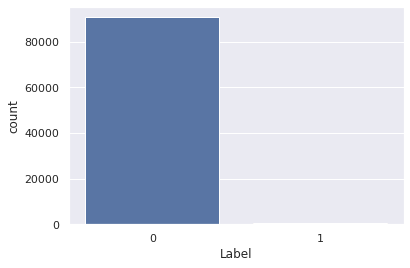

In [ ]:
rcParams['figure.figsize'] = 6, 4
sns.countplot('Label',data=train);

In [ ]:
train['Label'].value_counts()

0    90646
1      649
Name: Label, dtype: int64

In [ ]:
train.describe()

,account_id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,...,feature55_pre_1,feature55_pre_2,feature55_pre_3,feature55_pre_4,feature55_pre_5,feature3_pre_1,feature3_pre_2,feature3_pre_3,feature3_pre_4,feature3_pre_5,feature22_pre_2,feature22_pre_4,feature43_pre_1,feature43_pre_3,feature43_pre_5,feature53_pre_1,feature53_pre_2,feature53_pre_3,feature53_pre_4,feature53_pre_5,feature11_pre_1,feature47_pre_2,feature47_pre_3,feature47_pre_4,feature47_pre_5,feature18_pre_1,feature18_pre_2,feature18_pre_3,feature18_pre_4,feature18_pre_5,feature12_pre_1,feature12_pre_2,feature12_pre_3,feature12_pre_4,feature12_pre_5,feature19_pre_1,feature19_pre_2,feature19_pre_3,feature19_pre_4,feature19_pre_5
count,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,...,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000,91295.000000
mean,134442.236409,0.004644,0.000318,1.380078,0.000059,0.000052,0.001910,0.014888,0.000283,0.027315,0.001873,0.000117,0.162053,0.000807,0.004472,0.001695,0.001220,0.000195,0.114900,0.797733,0.000114,0.141719,0.130591,0.018342,0.000689,0.000316,0.000590,0.015292,0.009674,0.000542,0.000618,0.000013,0.022991,0.002912,0.001637,0.000290,0.014394,0.000667,0.025628,0.007365,...,0.019277,0.018482,0.017892,0.016995,0.017049,1.253100,1.219978,1.203414,1.173628,1.149308,0.092638,0.088281,0.035556,0.034433,0.033297,0.368811,0.357557,0.348148,0.333916,0.319791,0.000120,1.440478,1.393325,1.339644,1.298532,0.080344,0.078142,0.076569,0.073103,0.071471,0.120964,0.117775,0.115470,0.111299,0.108308,0.699192,0.678700,0.660109,0.637807,0.619006
std,43153.421667,0.124073,0.048068,15.757826,0.011526,0.011058,0.108821,0.543307,0.026601,1.951406,0.100870,0.016778,1.187640,0.097002,0.272578,0.067901,0.064746,0.021594,0.924309,7.171487,0.014411,1.302679,3.224094,0.378174,0.038873,0.027673,0.041899,0.594167,0.209166,0.038779,0.046318,0.005714,0.499899,0.093021,0.065599,0.035372,0.441574,0.039935,0.419112,0.354974,...,0.200235,0.198225,0.196827,0.194682,0.193007,14.833697,14.644022,14.619952,14.548342,14.488735,3.153737,3.150785,3.220747,3.220339,3.219922,2.963747,2.934725,2.917020,2.817610,2.722641,0.016741,17.919726,17.421984,17.208151,17.087287,0.689803,0.683417,0.679815,0.649352,0.645004,0.970041,0.963656,0.958897,0.934903,0.926045,6.247233,6.186885,6.120229,6.009112,5.930017
min,100000.000000,-0.894737,-0.705882,-0.999442,-0.500000,-0.500000,-0.916667,-0.992701,-0.700000,-0.998079,-0.872093,-0.500000,-0.987500,-0.812500,-0.909091,-0.857143,-0.857143,-0.714286,-0.985612,-0.998792,-0.571429,-0.992126,-0.970588,-0.988166,-0.666667,-0.823529,-0.866667,-0.993548,-0.971429,-0.755102,-0.840909,-0.571429,-0.968254,-0.769231,-0.920000,-0.882353,-0.981884,-0.500000,-0.954545,-0.957447,...,-0.975000,-0.975000,-0.975000,

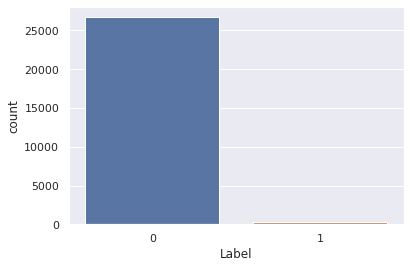

In [ ]:
sns.countplot('Label',data=test);

In [ ]:
test['Label'].value_counts()

0    26706
1      249
Name: Label, dtype: int64

Here, I have just stored 'account_id' , 'week_start_date' and Label into a list for the training set and testing set and also name of columns

In [ ]:
account_id_train = train['account_id'].tolist()
week_start_date_train = train['week_start_date'].tolist()
Label_train = train['Label'].tolist()

account_id_test = test['account_id'].tolist()
week_start_date_test = test['week_start_date'].tolist()
Label_test = test['Label'].tolist()



train = train.drop(['account_id','week_start_date','Label'],axis=1)
test = test.drop(['account_id','week_start_date','Label'],axis=1)

columns_list = train.columns

#Checking variance of independance variable

In [ ]:
variance=[]
for i in tqdm(columns_list):
  variance.append(train[i].var())

100%|██████████| 122/122 [00:00<00:00, 2113.83it/s]


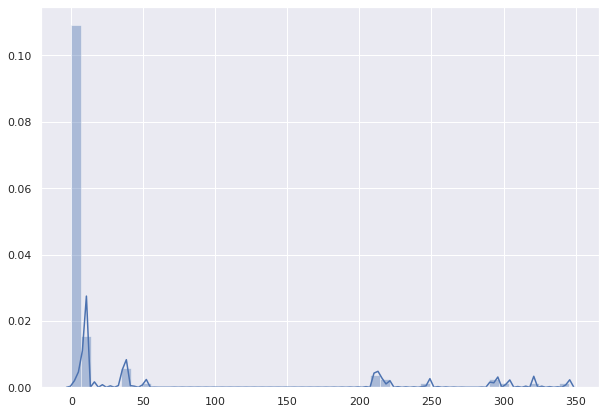

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

sns.distplot(variance);

***Observation***

> It's not that easy to interprete this plot because of bining bais

> So, Let's look at the ECDF of this data

In [ ]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

Plotting ECDF for variance of independance variable

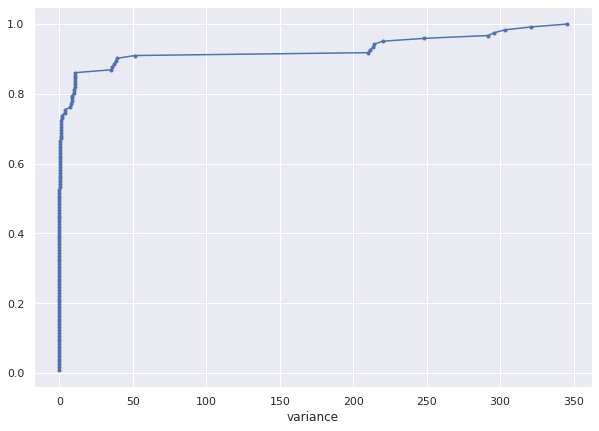

In [ ]:
x1,y1=ecdf(variance)
plt.plot(x1,y1,marker='.',linestyle=None)
plt.xlabel('variance')
plt.show()

**Observation**

> More then 70% feature have almost Zero variance

> Which means this 70% features will not affect our target variable that much

# Scaling Data

> Scaling is very important step as its bring everything into a particular range

> It can also reduce the time taken in training model in most of the cases

> and can help in improving accuracy

In [ ]:
ss=StandardScaler()
ss.fit(train)

train=ss.transform(train)
train=pd.DataFrame(train)
train.columns=columns_list

In [ ]:
test.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,...,feature55_pre_1,feature55_pre_2,feature55_pre_3,feature55_pre_4,feature55_pre_5,feature3_pre_1,feature3_pre_2,feature3_pre_3,feature3_pre_4,feature3_pre_5,feature22_pre_2,feature22_pre_4,feature43_pre_1,feature43_pre_3,feature43_pre_5,feature53_pre_1,feature53_pre_2,feature53_pre_3,feature53_pre_4,feature53_pre_5,feature11_pre_1,feature47_pre_2,feature47_pre_3,feature47_pre_4,feature47_pre_5,feature18_pre_1,feature18_pre_2,feature18_pre_3,feature18_pre_4,feature18_pre_5,feature12_pre_1,feature12_pre_2,feature12_pre_3,feature12_pre_4,feature12_pre_5,feature19_pre_1,feature19_pre_2,feature19_pre_3,feature19_pre_4,feature19_pre_5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Scalling test set

In [ ]:
test=ss.transform(test)
test=pd.DataFrame(test)
test.columns=columns_list

#Checking variance of independance variable after scaling

In [ ]:
variance=[]
for i in columns_list:
  variance.append(train[i].var())

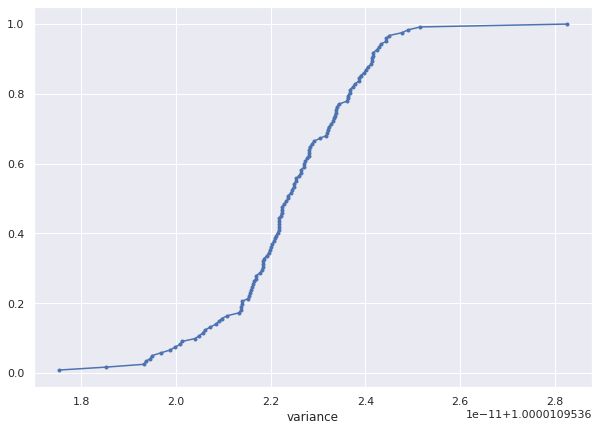

In [ ]:
x1,y1=ecdf(variance)
plt.plot(x1,y1,marker='.',linestyle=None)
plt.xlabel('variance')
plt.show()

**Observation**

> Now, variance look good all thanks to scalling

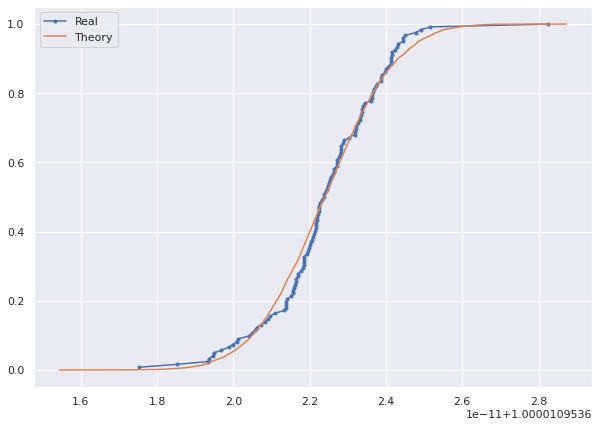

In [ ]:
x1,y1=ecdf(variance)
x2,y2=ecdf(np.random.normal(np.mean(variance),np.std(variance),size=10000))
plt.plot(x1,y1,marker='.',linestyle=None)

plt.plot(x2,y2)
plt.legend(['Real', 'Theory'])
plt.show()

**Observation**

>  Now, variance of independence variable look's like normally distributed but it is not normally distrubuted 


# Feature Selection

Training Random Forest Classifier and Gradient Boosting Classifier models for feature selection

***Note***:- Here, we can use Varaince Thresholding for Feature Selection also by I'm using Random Forest and Gradient Boosting   

In [ ]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=321).fit(train,Label_train)
gbc=GradientBoostingClassifier(random_state=321).fit(train,Label_train)

In [ ]:
rfc.feature_importances_

array([2.07874851e-03, 0.00000000e+00, 1.13472179e-02, 1.00438559e-03,
       1.99398467e-05, 4.83717215e-04, 4.37305378e-04, 9.57203375e-05,
       4.01766951e-04, 1.07890349e-03, 9.67235137e-03, 3.28993232e-03,
       3.79054594e-05, 2.40655718e-04, 1.88660459e-01, 3.09018171e-02,
       1.19350316e-03, 2.73415650e-03, 2.91306372e-03, 3.35608972e-07,
       2.90902171e-03, 1.33843024e-02, 2.10789928e-03, 6.50234682e-04,
       2.51121866e-05, 3.55150103e-04, 8.78547961e-05, 2.80983284e-03,
       3.13381999e-05, 6.03362254e-07, 5.99386784e-04, 8.07636340e-04,
       7.59517653e-05, 2.14135025e-03, 1.72415893e-05, 1.10672861e-03,
       4.12578056e-02, 9.66176026e-04, 5.80863162e-04, 1.45171519e-03,
       2.45786292e-03, 1.19662218e-05, 1.14516254e-02, 2.49645576e-05,
       3.87307367e-05, 8.28951493e-04, 3.91053264e-03, 5.39397317e-04,
       2.92698972e-04, 3.06786483e-04, 0.00000000e+00, 0.00000000e+00,
       6.49783352e-03, 4.98138247e-04, 2.39120139e-02, 5.41900050e-04,
      

#Visualizing Feature Importance as per as Random Forest Classifier

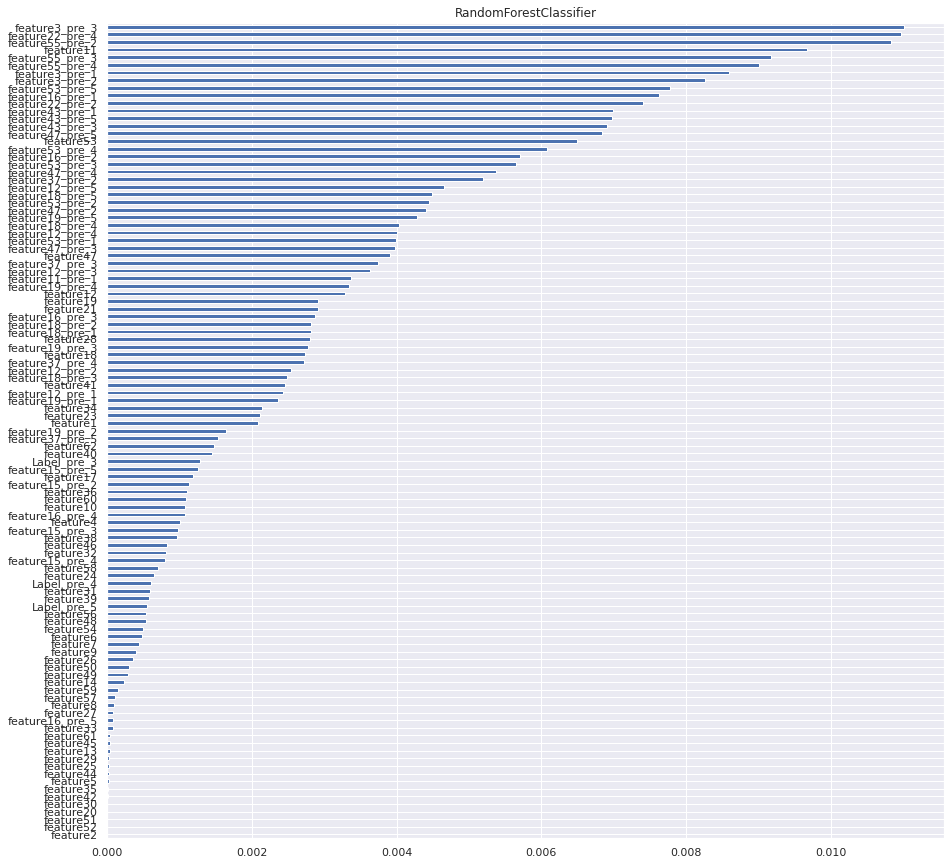

In [ ]:
rcParams['figure.figsize'] = 25, 25
importances_rf=pd.Series(rfc.feature_importances_,index=train.columns)
importances_rf_sort=importances_rf.sort_values()
importances_rf_sort[:-15].plot(kind='barh',figsize=(15,15));
plt.title('RandomForestClassifier')
plt.show()

#Visualizing Feature Importance as per as Gradient Boosting Classifier

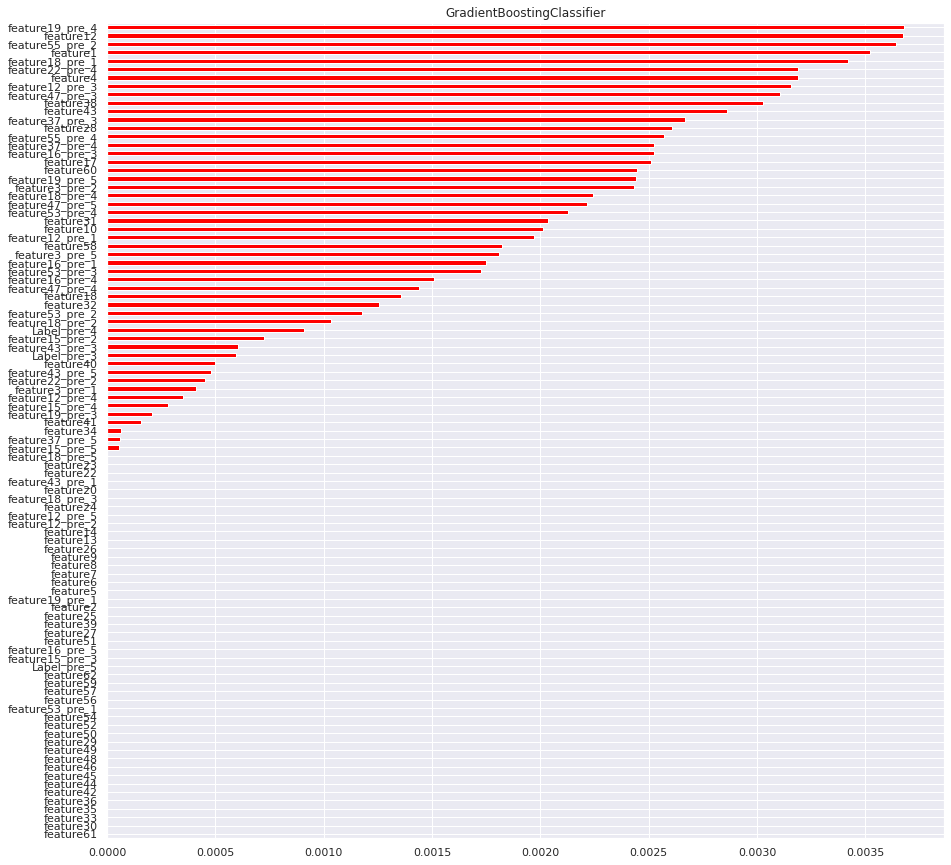

In [ ]:
importances_gb=pd.Series(gbc.feature_importances_,index=train.columns)
importances_gb_sort=importances_gb.sort_values()
importances_gb_sort[:-25].plot(kind='barh',figsize=(15,15),color='red');
plt.title('GradientBoostingClassifier')
plt.show()

In [ ]:
rfc.feature_importances_!=0

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

***Observation***

> Only 3 independent variable have zero importance By Random Forest 

In [ ]:
rfc.feature_importances_>0.01

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

***Observation***

> There are very less Independent variable which have high correlation with Dependent variable as most of the feature have less then 0.01 feature_importance

> we have observed the same thing when we have plotted the graph between the variance of Independent variable

# Eliminating non important feature using RFE with the property of Random Forest
> Here, we are using ***Recursive Feature Elimination*** because as we start droping features one by one importance of features change dynamically

> we'll be selecting top 15 feature from Random Forest

In [ ]:
rfe_rf=RFE(estimator=RandomForestClassifier(n_jobs=-1,random_state=321),n_features_to_select=15,step=45,verbose=1)  
rfe_rf.fit(train,Label_train)

Fitting estimator with 122 features.
Fitting estimator with 77 features.
Fitting estimator with 32 features.


RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=-1,
                                     oob_score=False, random_state=321,
                                     verbose=0, warm_start=False),
    n_features_to_select=15, step=45, verbose=1)

#Eliminating non important feature using RFE with the property of Gradient Boosting

> we'll be selecting top 10 feature from Gradient Boosting

> I'm doing bias here as I'm selecting only 10 feature from Gradient Boosting and 15 feature by Random Forest 

> Because I have observed that Random Forest is doing well then Gradient Boosting in this case 

In [ ]:
rfe_gb=RFE(estimator=GradientBoostingClassifier(random_state=321,max_depth=2),n_features_to_select=10,step=45,verbose=1) 
rfe_gb.fit(train,Label_train)

Fitting estimator with 122 features.
Fitting estimator with 77 features.
Fitting estimator with 32 features.


RFE(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                         criterion='friedman_mse', init=None,
                                         learning_rate=0.1, loss='deviance',
                                         max_depth=2, max_features=None,
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=100,
                                         n_iter_no_change=None,
                                         presort='deprecated', random_state=321,
                                         subsample=1.0, tol=0.0001,
                                         validation_fr

* Doing voting for features from Random Forest and Gradient Boosting 
* we have choice two model for selecting importance features from data set 
* Because might be possible that an important feature may be get droped by a model but other model will take it into account




In [ ]:
gb_mask=rfe_gb.support_
rf_mask=rfe_rf.support_

votes=np.sum([gb_mask,rf_mask],axis=0)
votes

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Here, we will select features which have more then 0 vote and create it's mask



In [ ]:
mask = votes>0

Creating reverse of this mask and storing it into mask_rev 

In [ ]:
mask_rev = [not i for i in mask]

Storing features which have less like to be dependent on target variable 

In [ ]:
train_N_IMP = train.loc[:,mask_rev]
test_N_IMP = test.loc[:,mask_rev]

Storing Importance feature for predicting Dependent variable 

In [ ]:
train_IMP=train.loc[:,mask]
test_IMP=test.loc[:,mask]

Here are the name of importance feature

In [ ]:
train_IMP.columns

Index(['feature3', 'feature11', 'feature15', 'feature16', 'feature19',
       'feature22', 'feature37', 'feature47', 'feature55', 'Label_pre_1',
       'Label_pre_2', 'feature15_pre_1', 'feature55_pre_2', 'feature3_pre_2',
       'feature3_pre_3', 'feature3_pre_4', 'feature3_pre_5',
       'feature22_pre_4'],
      dtype='object')

# Visualizing pearson correlation for Important features

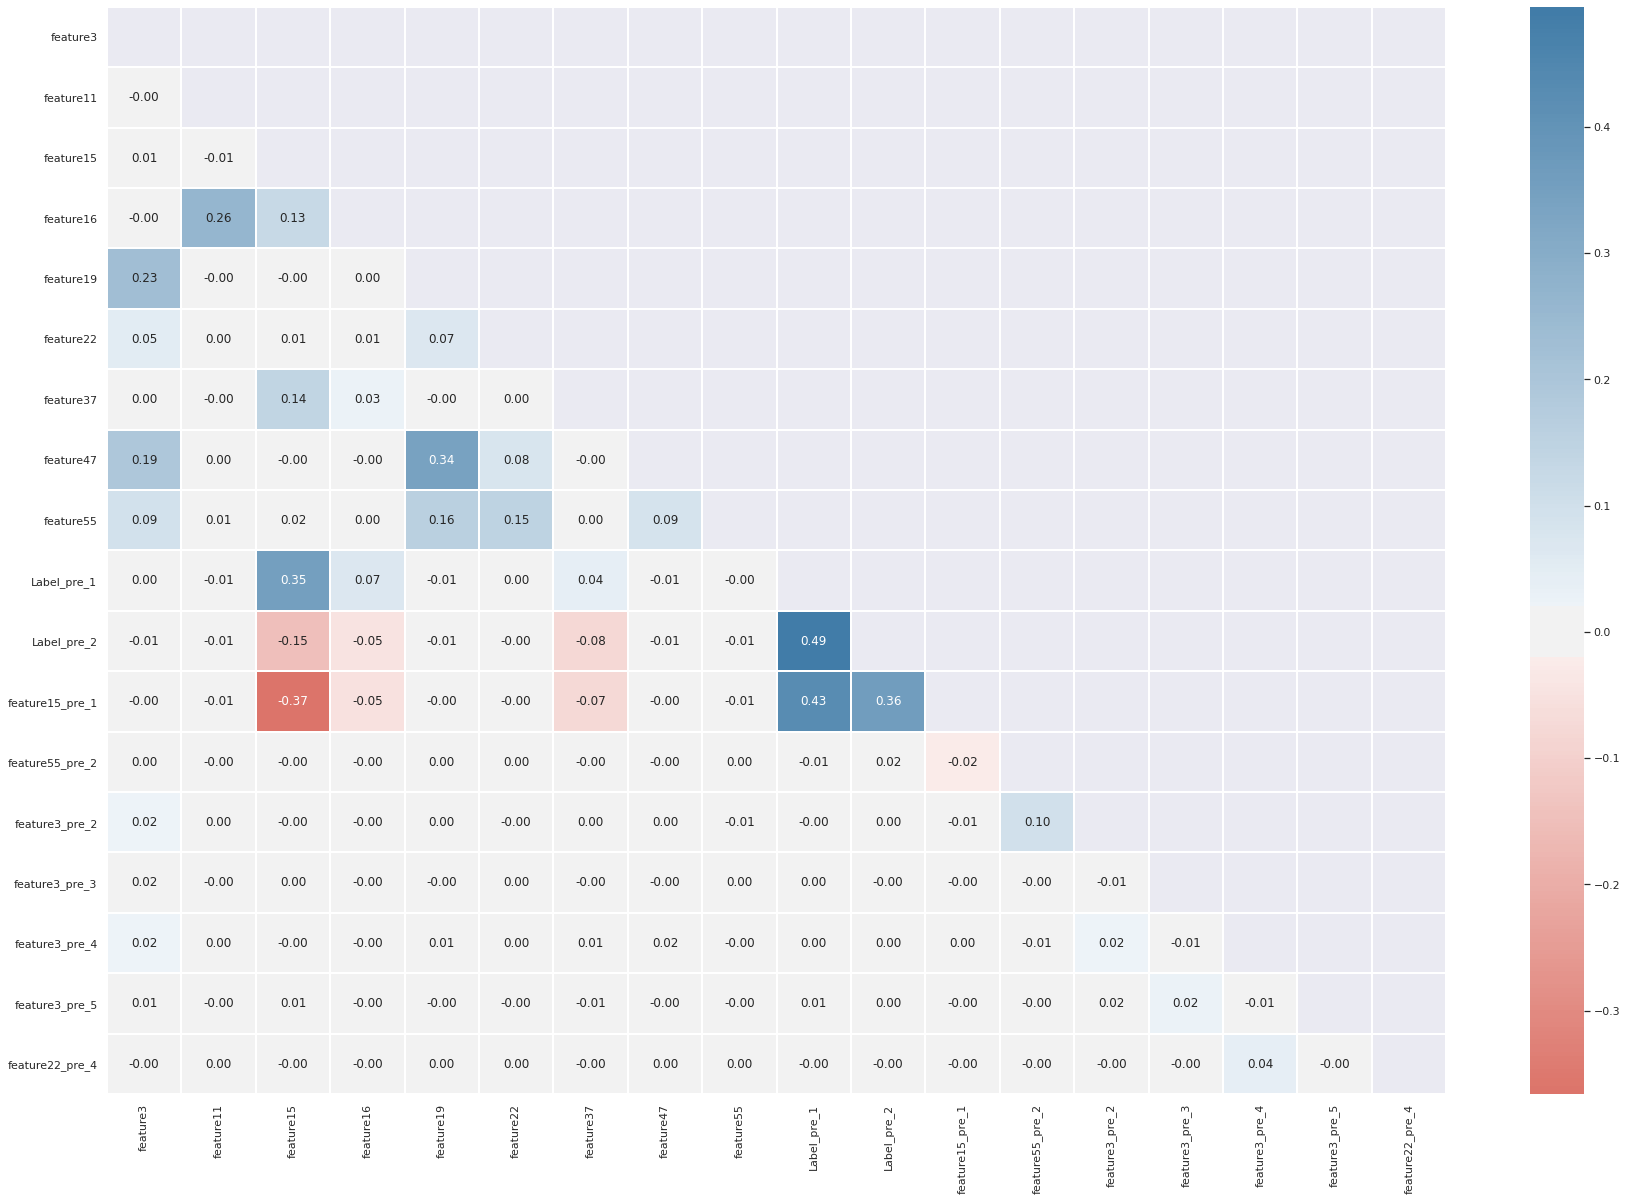

In [ ]:
fig_dims = (30,20)
fig, ax = plt.subplots(figsize=fig_dims)

mask=np.triu(np.ones_like(train_IMP.corr(),dtype=bool))

cmap=sns.diverging_palette(h_neg=15,h_pos=240,as_cmap=True)
sns.heatmap(train_IMP.corr(),mask=mask,center=0,cmap=cmap,linewidths=1,annot=True,fmt='.2f',ax=ax);

In [ ]:
#sns.pairplot(train);

# Feature Extraction using PCA

> Applying PCA to features which are less likely to corrleate with target variable

> It may seems an opposite approch to you but I can work really well

In [ ]:
try_pca=PCA(random_state=321).fit(train_N_IMP)

In [ ]:
try_pca.explained_variance_ratio_

array([0.04028924, 0.03033378, 0.0265874 , 0.02563526, 0.02531358,
       0.02292533, 0.02120485, 0.01986014, 0.01956187, 0.01908801,
       0.01892211, 0.01827268, 0.01667763, 0.0163347 , 0.01621282,
       0.01542539, 0.01531121, 0.01465195, 0.01399754, 0.01366333,
       0.01353396, 0.01219861, 0.01181344, 0.01173466, 0.01166656,
       0.0114525 , 0.01131869, 0.01112925, 0.01078756, 0.01052949,
       0.01035785, 0.01029091, 0.00991161, 0.00983872, 0.00977812,
       0.0097393 , 0.00970341, 0.00962242, 0.0095676 , 0.00954824,
       0.0095018 , 0.00940364, 0.00934794, 0.00929467, 0.009173  ,
       0.00915114, 0.00903596, 0.00894918, 0.00891579, 0.00884257,
       0.0087753 , 0.00866109, 0.00862815, 0.00848809, 0.00843337,
       0.00825651, 0.00800233, 0.00792883, 0.00767361, 0.00741375,
       0.00728311, 0.00721521, 0.00709349, 0.00698679, 0.00694531,
       0.00687252, 0.00676278, 0.00667526, 0.00654306, 0.00639134,
       0.0063028 , 0.00622543, 0.00611509, 0.00603078, 0.00595

In [ ]:
try_pca.explained_variance_ratio_.cumsum()

array([0.04028924, 0.07062301, 0.09721042, 0.12284568, 0.14815925,
       0.17108458, 0.19228943, 0.21214956, 0.23171144, 0.25079944,
       0.26972155, 0.28799423, 0.30467185, 0.32100655, 0.33721937,
       0.35264476, 0.36795597, 0.38260792, 0.39660546, 0.41026879,
       0.42380275, 0.43600136, 0.44781479, 0.45954945, 0.47121601,
       0.48266852, 0.49398721, 0.50511646, 0.51590402, 0.52643351,
       0.53679136, 0.54708227, 0.55699388, 0.5668326 , 0.57661072,
       0.58635002, 0.59605342, 0.60567585, 0.61524344, 0.62479168,
       0.63429348, 0.64369712, 0.65304507, 0.66233974, 0.67151275,
       0.68066388, 0.68969984, 0.69864902, 0.7075648 , 0.71640737,
       0.72518268, 0.73384377, 0.74247192, 0.75096   , 0.75939337,
       0.76764988, 0.77565221, 0.78358104, 0.79125464, 0.79866839,
       0.80595151, 0.81316672, 0.8202602 , 0.82724699, 0.83419231,
       0.84106483, 0.84782761, 0.85450287, 0.86104593, 0.86743727,
       0.87374007, 0.8799655 , 0.8860806 , 0.89211138, 0.89806

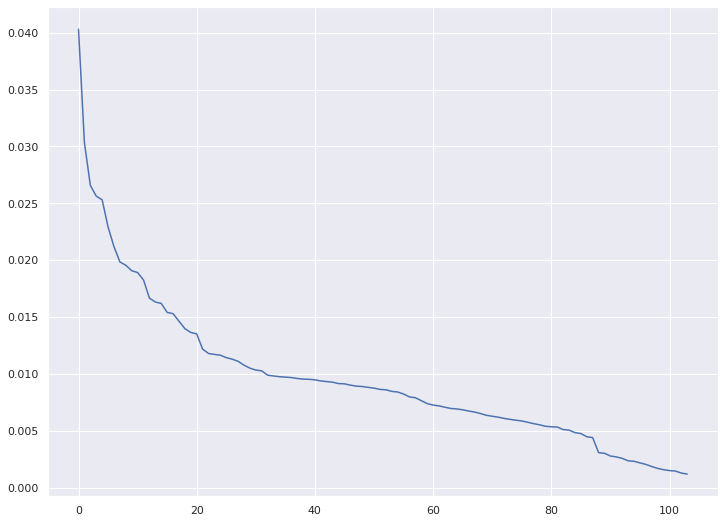

In [ ]:
rcParams['figure.figsize'] = 12, 9

plt.plot(try_pca.explained_variance_ratio_)

**Observation**

> Unable to find elbow point

 Selecting only 10% of data from non-important features

In [ ]:
pca=PCA(random_state=321,n_components=0.1).fit(train_N_IMP)

In [ ]:
train_N_IMP_ = pca.transform(train_N_IMP)
test_N_IMP_ = pca.transform(test_N_IMP)

train_N_IMP_ = pd.DataFrame(train_N_IMP_)
test_N_IMP_ = pd.DataFrame(test_N_IMP_)

In [ ]:
train_N_IMP_.shape

(91295, 4)

# Visualizing 10% of PCA non-important data




In [ ]:
'''temp_= train_N_IMP_.copy()
temp_['Label']=Label_train
sns.pairplot(data=temp_, hue='Label');'''

"temp_= train_N_IMP_.copy()\ntemp_['Label']=Label_train\nsns.pairplot(data=temp_, hue='Label');"



![alt text](https://drive.google.com/uc?export=view&id=1ncxzS73hrhBSM750ZrqIkYQZmkVCe40k
)


# Applying PCA to Important features

In [ ]:
try_pca2=PCA(random_state=321).fit(train_IMP)
try_pca2.explained_variance_ratio_.cumsum()

array([0.10443145, 0.19483594, 0.27606811, 0.34378989, 0.40521917,
       0.46388894, 0.52183264, 0.57833634, 0.63265152, 0.6862204 ,
       0.73805614, 0.78771357, 0.83520488, 0.88084744, 0.92081381,
       0.9564822 , 0.98972717, 1.        ])

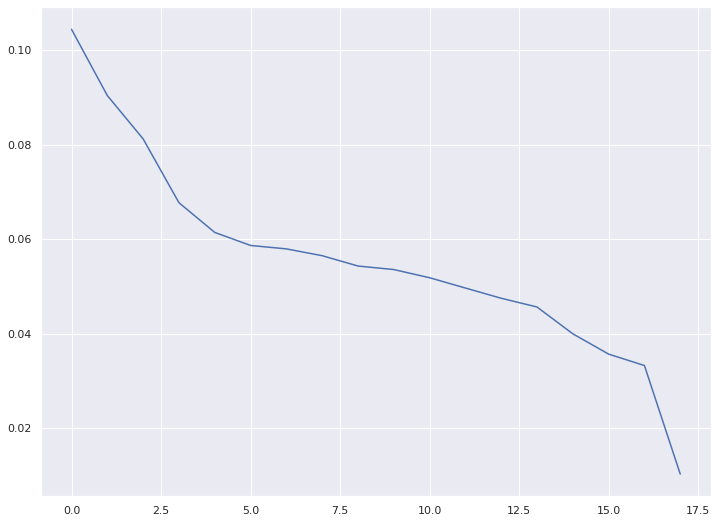

In [ ]:
rcParams['figure.figsize'] = 12, 9

plt.plot(try_pca2.explained_variance_ratio_);

# Selecting 40% of variance from PCA of important features 

In [ ]:
pca2=PCA(random_state=321,n_components=0.4).fit(train_IMP)
pca2.explained_variance_ratio_.cumsum()

array([0.10443145, 0.19483594, 0.27606811, 0.34378989, 0.40521917])

In [ ]:
_train = pca2.transform(train_IMP)
_test = pca2.transform(test_IMP)

_train = pd.DataFrame(_train)
_test = pd.DataFrame(_test)

# Visualizing 40% of PCA important data


In [ ]:
'''temp_= _train.copy()
temp_['Label']=Label_train
sns.pairplot(data=temp_, hue='Label');'''

"temp_= _train.copy()\ntemp_['Label']=Label_train\nsns.pairplot(data=temp_, hue='Label');"



![alt text](https://drive.google.com/uc?export=view&id=1zr_vD1bzo4zsPFeD-BrEqxlNXM3uP62d
)

# Concating 40% of important and 10% of Non-Important feature's PCA components 

In [ ]:
train_ = pd.concat([_train, train_N_IMP_],axis=1)
test_ = pd.concat([_test, test_N_IMP_],axis=1)

**Obervation**

> Our final Processed data have 21 features

In [ ]:
train_.shape

(91295, 9)

In [ ]:
'''m = TSNE(learning_rate=100,verbose=0)

tsne = m.fit_transform(test_)
x = tsne[:,0]
y = tsne[:,1]
sns.scatterplot(x=x,y=y,hue=Label_test);'''

'm = TSNE(learning_rate=100,verbose=0)\n\ntsne = m.fit_transform(test_)\nx = tsne[:,0]\ny = tsne[:,1]\nsns.scatterplot(x=x,y=y,hue=Label_test);'



![alt text](https://drive.google.com/uc?export=view&id=1UNpNMZKfe0vFZBP_6rC34R6C2OTqNRkM)

# Training Machine Learning Model

In [ ]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=321,n_estimators=150)
rfc.fit(train_,Label_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=321, verbose=0,
                       warm_start=False)

Here, I have note tuned this model because it will not increase much accuracy that why i have used default setting for the algorithm

> We can try hyperparameter tunning with randomizedSearchCV or GridSearchCV but It will only improve our perfomance by very less margin


In [ ]:
confusion_matrix(Label_test,rfc.predict(test_))

array([[26703,     3],
       [   71,   178]])

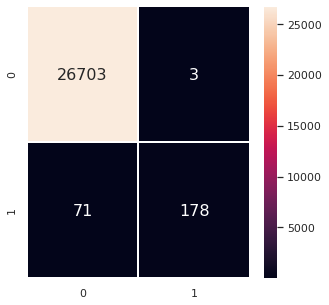

In [ ]:
rcParams['figure.figsize'] = 5, 5

sns.heatmap(confusion_matrix(Label_test,rfc.predict(test_)),annot=True, annot_kws={"size": 16},linewidths=1,fmt='d');

# ROC Curve

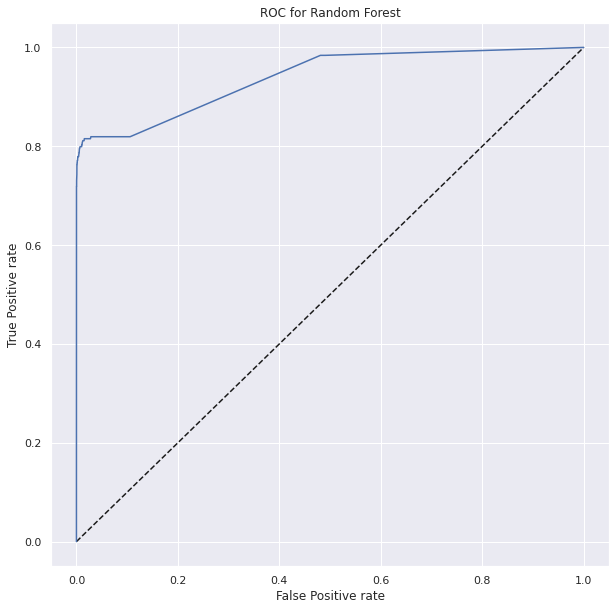

In [ ]:
rcParams['figure.figsize'] = 10, 10
output=rfc.predict_proba(test_)[:,1]
fpr,tpr, thr =roc_curve(Label_test,output)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC for Random Forest')
plt.show()

# Precision Recall Curve

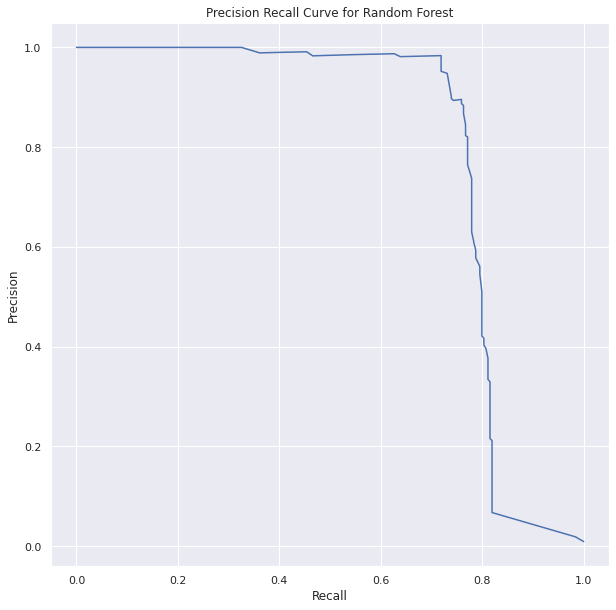

In [ ]:
precision, recall, _ = precision_recall_curve(Label_test, output)

plt.plot( recall,precision)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision Recall Curve for Random Forest')
plt.show()

In [ ]:
test_.shape

(26955, 9)

# Recall

In [ ]:
recall_score(Label_test,rfc.predict(test_))

0.714859437751004

# Precision

In [ ]:
precision_score(Label_test,rfc.predict(test_))

0.9834254143646409

In [ ]:
print(precision_recall_fscore_support(Label_test,rfc.predict(test_)))

(array([0.99734817, 0.98342541]), array([0.99988767, 0.71485944]), array([0.99861631, 0.82790698]), array([26706,   249]))
